## Imports

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import netCDF4
import cartopy.crs as ccrs
from scipy.interpolate import griddata
from statistics import variance
from scipy.stats import pearsonr
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches

## Loading Datasets

In [2]:
O2min = xr.open_dataarray('O2min_global_timemean.nc')
wind_ds = xr.open_dataset('Global_winds_timemean.nc')

## Plot

In [3]:
taux = wind_ds['TAUX']/10
tauy = wind_ds['TAUY']/10
lon = wind_ds.lon
lat = wind_ds.lat

In [4]:
X, Y = np.meshgrid(wind_ds.lon, wind_ds.lat)

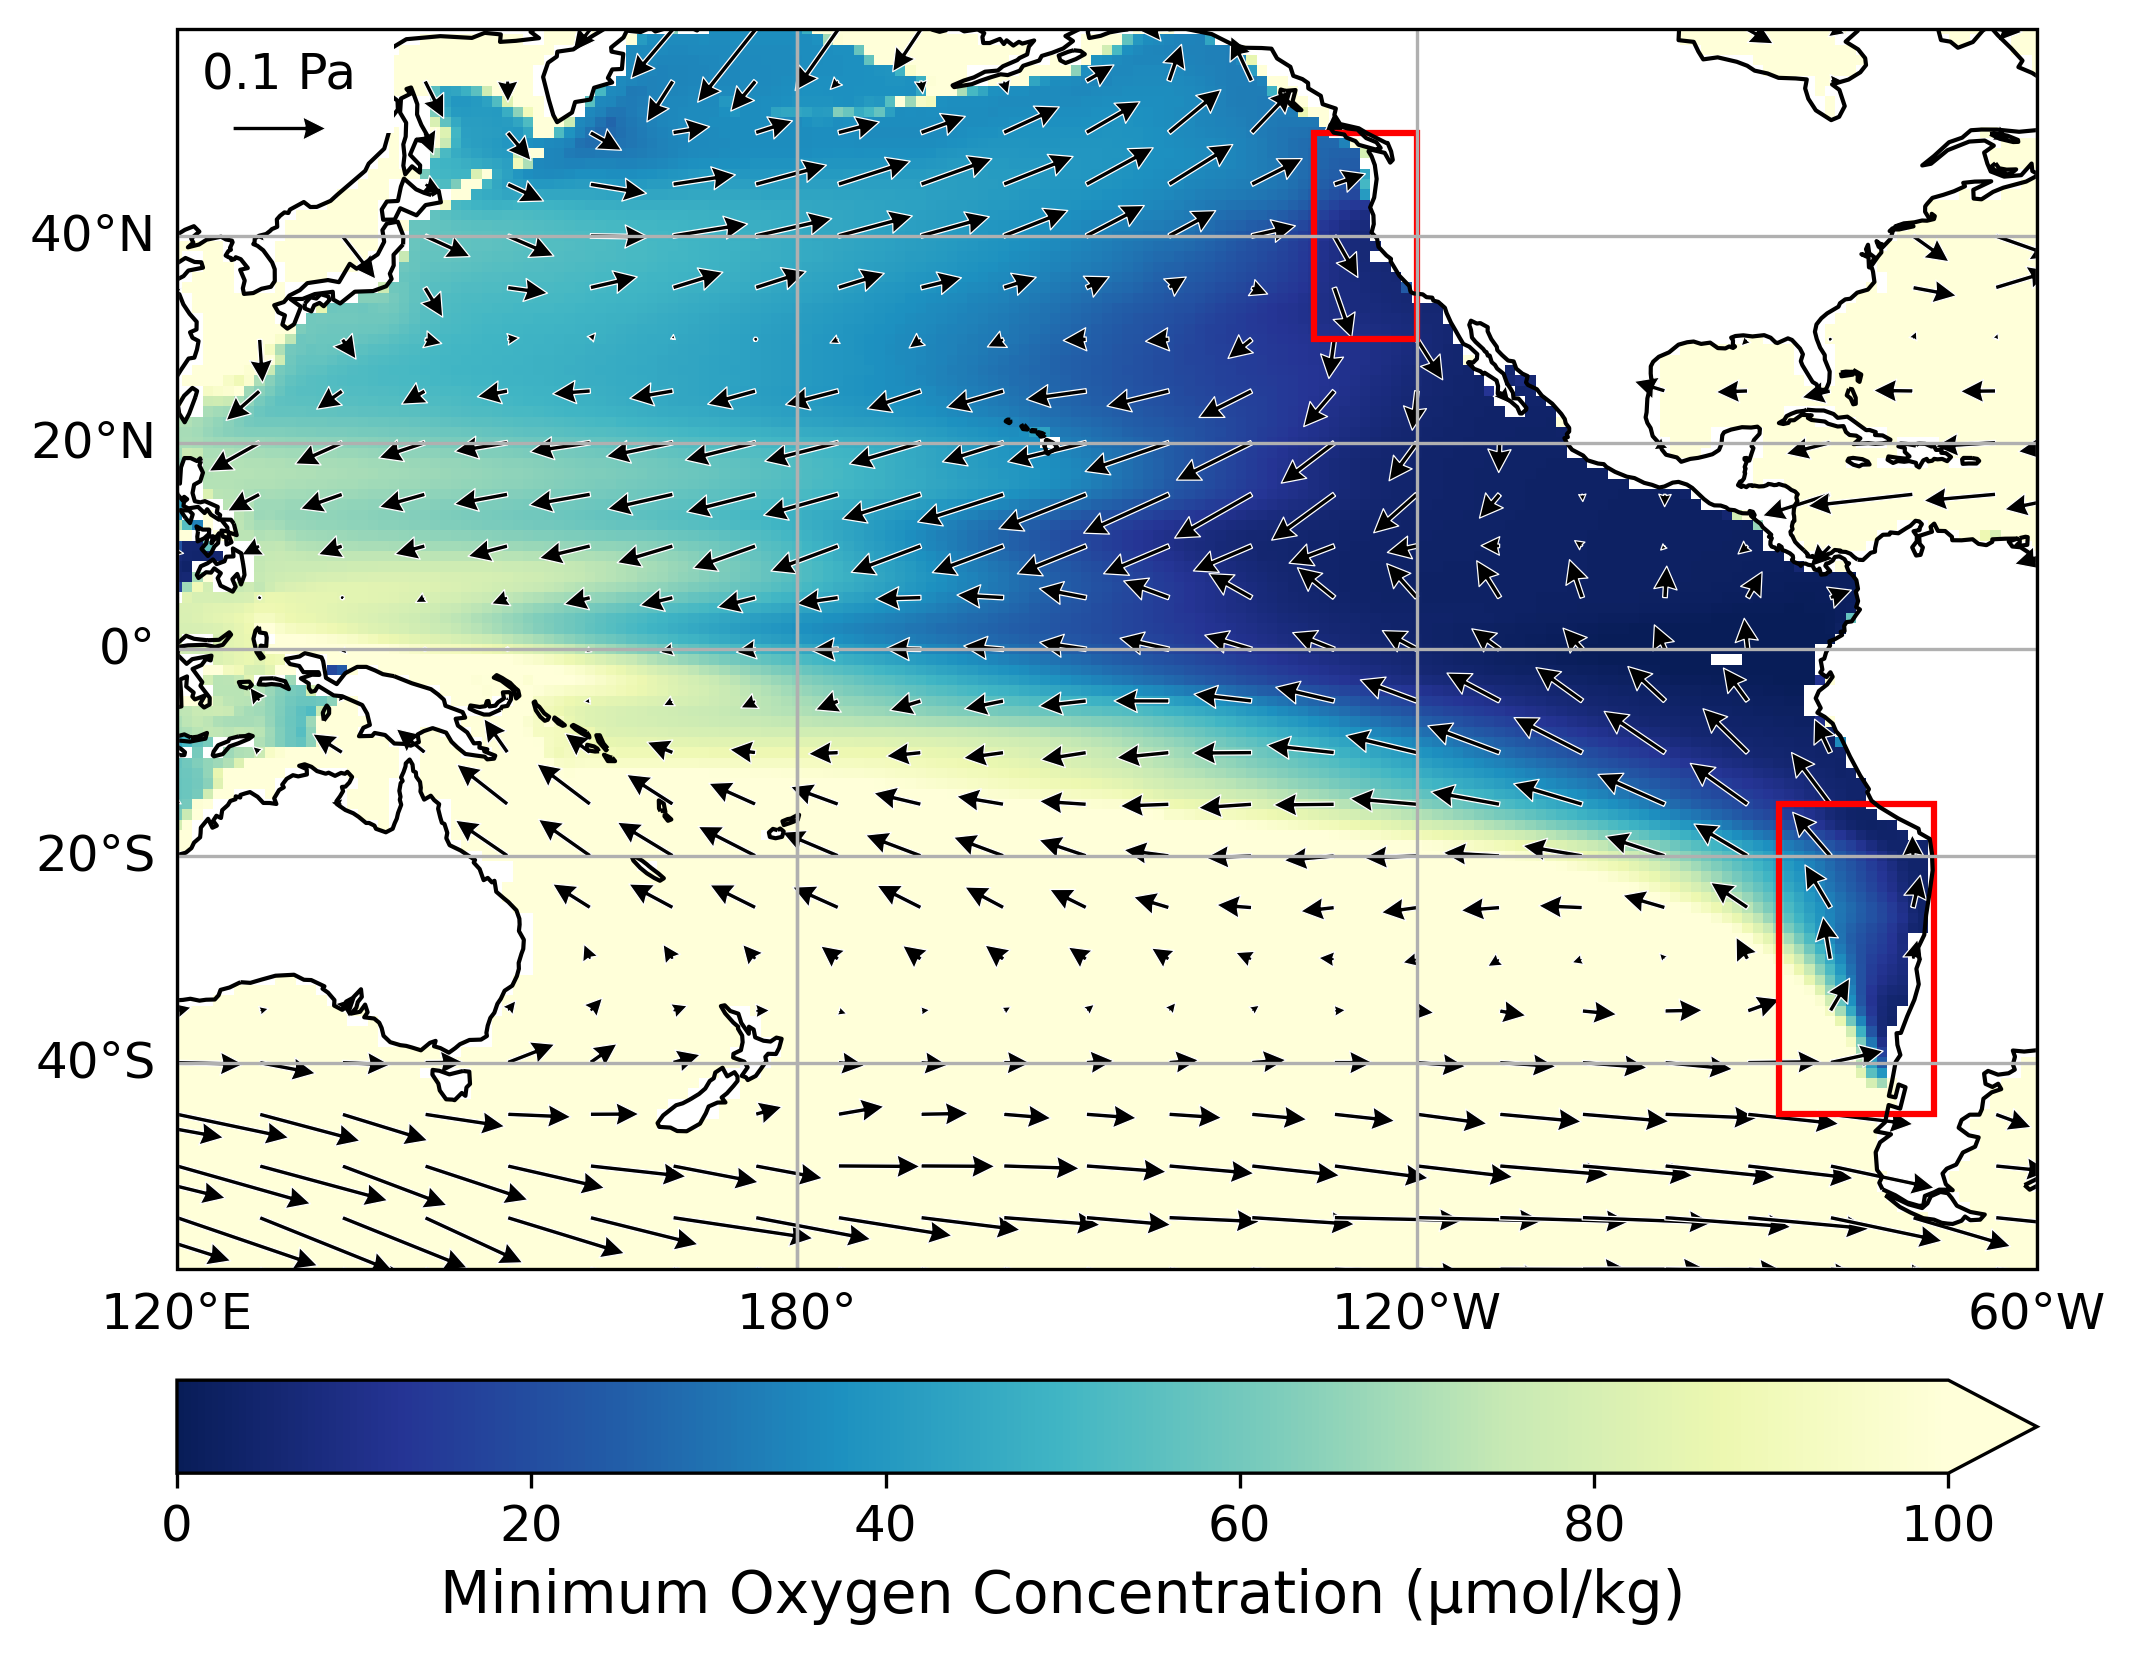

In [5]:
fig = plt.figure(figsize=(8,8), dpi=300)

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines()

plot = plt.pcolormesh(O2min.lon, O2min.lat, O2min, transform=ccrs.PlateCarree(), cmap = 'YlGnBu_r', vmin=0, vmax=100)
cbar = plt.colorbar(plot, orientation='horizontal', extend='max', pad=0.06)
cbar.ax.set_xlabel('Minimum Oxygen Concentration (µmol/kg)', fontsize=14)
cbar.ax.tick_params(labelsize=12)

skip = (slice(None, None, 5), slice(None, None, 8)) # Skip some data points for less arrow density
q = ax.quiver(X[skip], Y[skip], taux.values[skip], tauy.values[skip], transform=ccrs.PlateCarree(), 
          headwidth=5,headlength=5, scale=2, width=0.0025, facecolor='black', edgecolor='white', linewidth=.3)
qk = plt.quiverkey(q, X=0.055, Y=.92, U=0.1, label='0.1 Pa', zorder=11)
qk.text.set_fontsize(12)
ax.add_patch(mpatches.Rectangle(xy=[121, 50], width=20, height=9,
                                facecolor='white',
                                transform=ccrs.PlateCarree(), zorder=10)
             )

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size':12}
gl.ylabel_style = {'size':12}

ax.add_patch(mpatches.Rectangle(xy=[-130, 30], width=10, height=20,
                                edgecolor='red',
                                facecolor='None',
                                alpha=1,
                                linewidth=1.5,
                                transform=ccrs.PlateCarree())
             )
ax.add_patch(mpatches.Rectangle(xy=[275, -45], width=15, height=30,
                                edgecolor='red',
                                facecolor='None',
                                alpha=1,
                                linewidth=1.5,
                                transform=ccrs.PlateCarree())
             )

ax.set_extent([120, -60, -60, 60], crs=ccrs.PlateCarree(central_longitude=180))

plt.show()

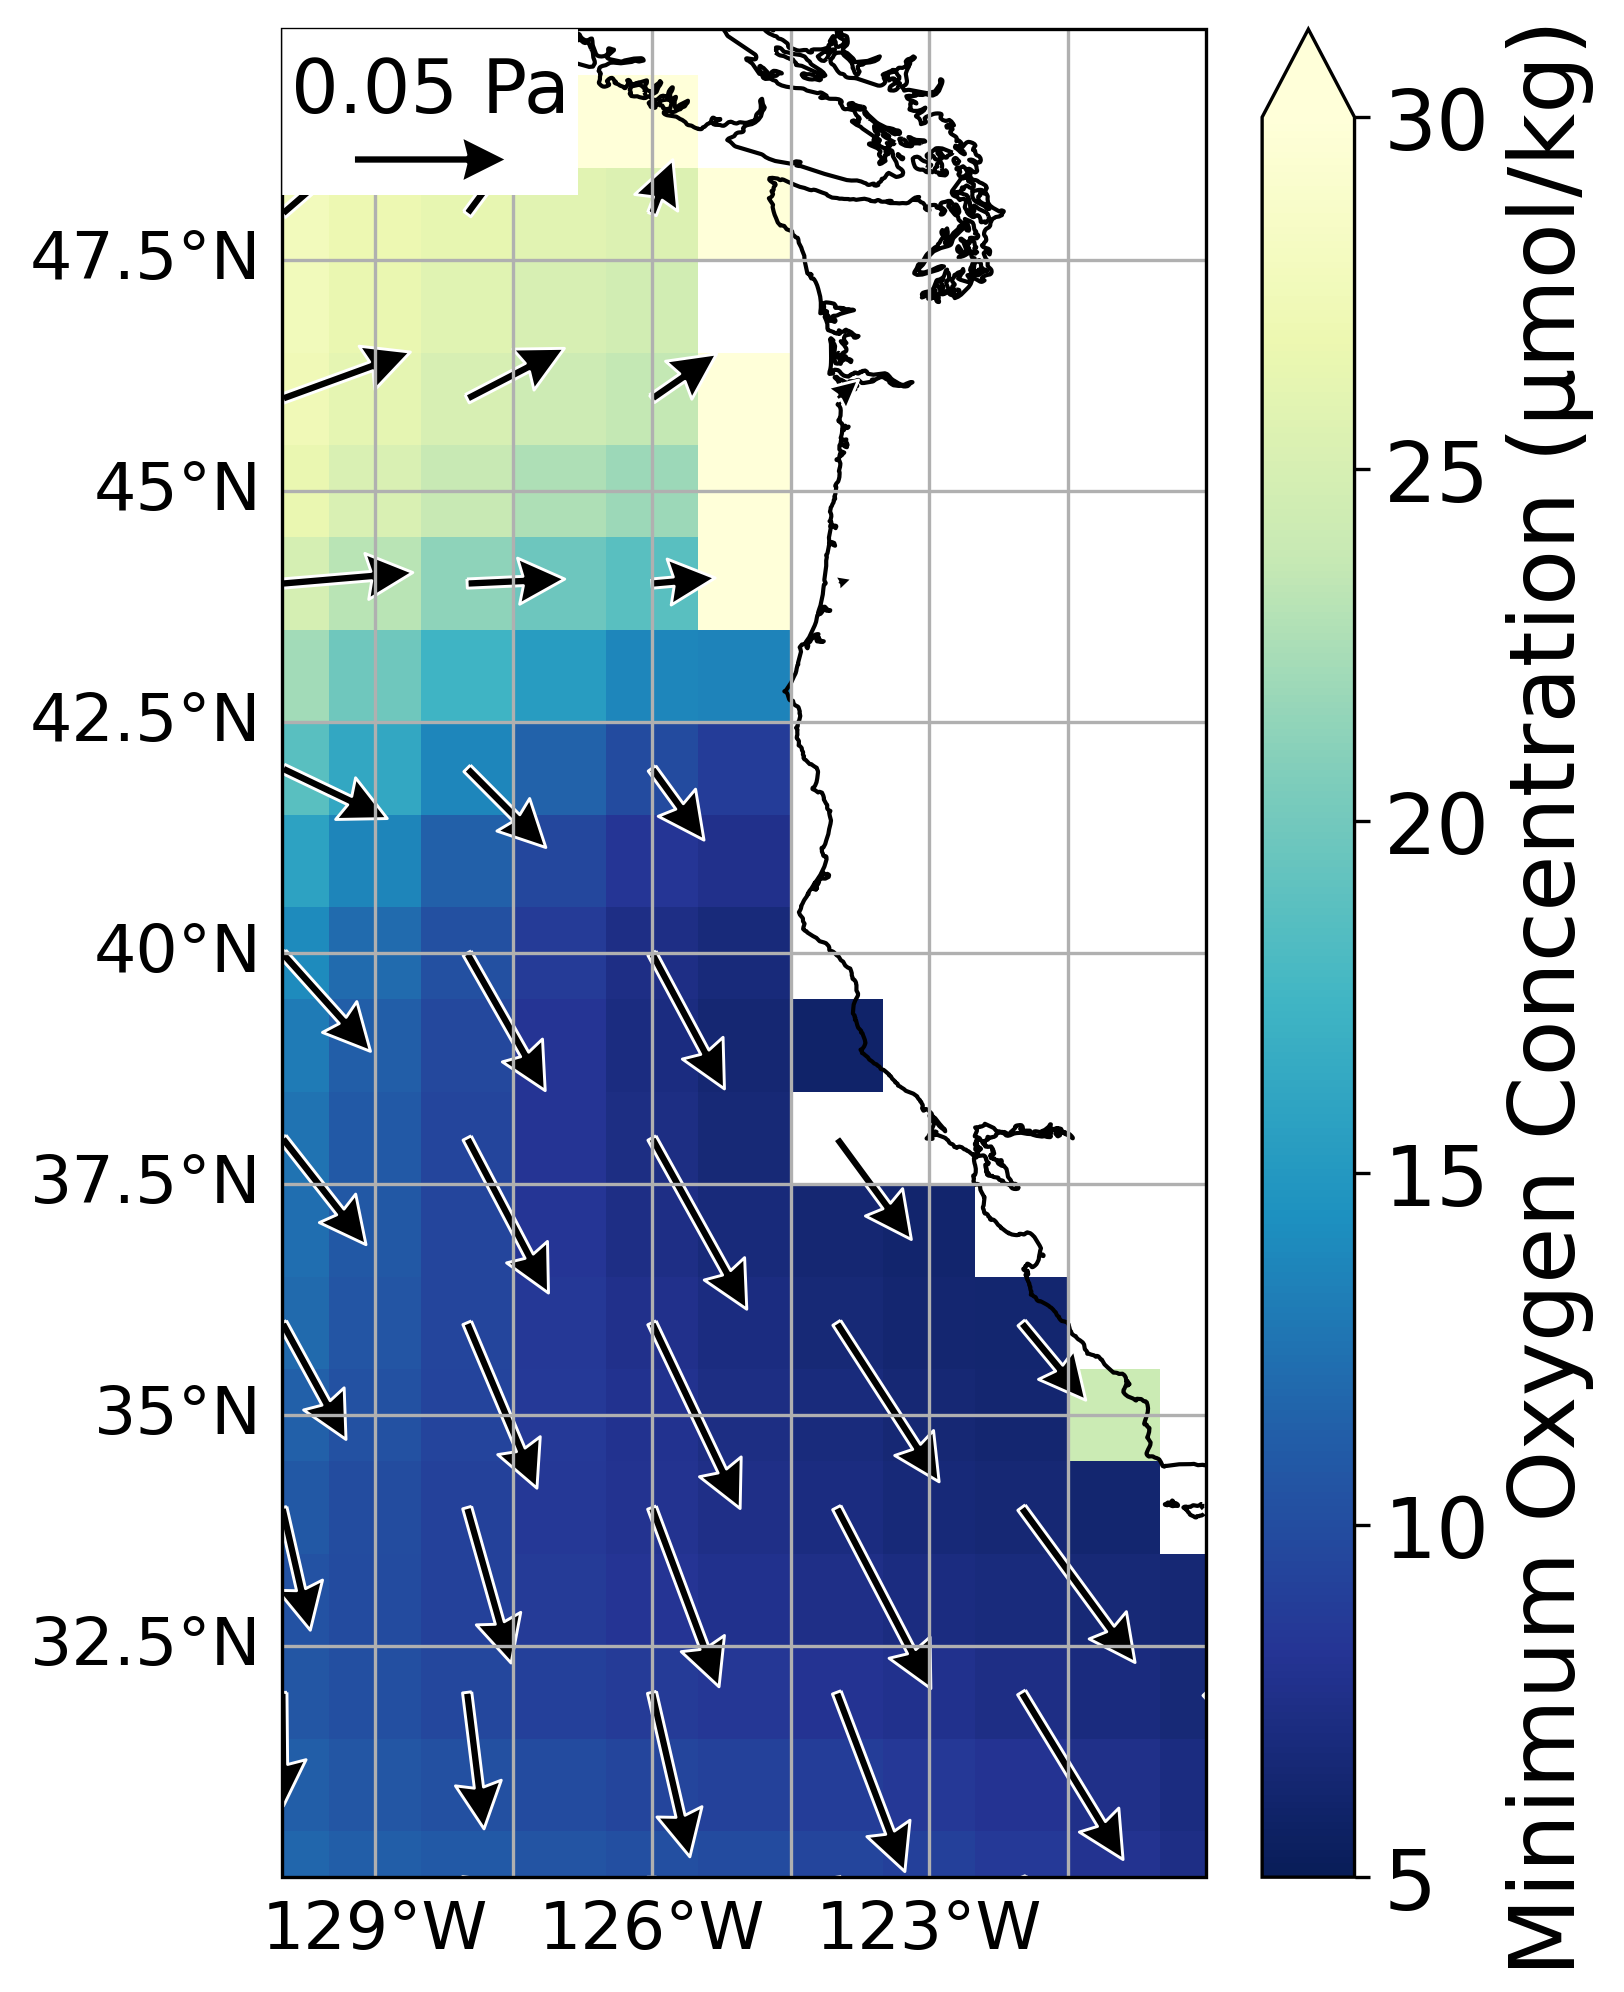

In [13]:
fig = plt.figure(figsize=(8,8), dpi=300)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plot = plt.pcolormesh(O2min.lon, O2min.lat, O2min, transform=ccrs.PlateCarree(), cmap = 'YlGnBu_r', vmin=5, vmax=30)
cbar = plt.colorbar(plot, orientation='vertical', extend='max', pad=0.03)
cbar.ax.set_ylabel('Minimum Oxygen Concentration (µmol/kg)', fontsize=22)
cbar.ax.tick_params(labelsize=20)

skip = (slice(None, None, 2), slice(None, None, 2)) # Skip some data points for less arrow density
q = plt.quiver(X[skip],Y[skip],taux.values[skip],tauy.values[skip],headwidth=5,headlength=5, scale=0.3, width=0.01, 
               facecolor='black', edgecolor='white', linewidth=0.7, zorder=2)
qk = plt.quiverkey(q, X=0.16, Y=.93, U=0.05, label='0.05 Pa', zorder=11)
qk.text.set_fontsize(18)
ax.add_patch(mpatches.Rectangle(xy=[-130, 48.2], width=3.2, height=2,
                                facecolor='white',
                                transform=ccrs.PlateCarree(), zorder=10)
             )

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size':16}
gl.ylabel_style = {'size':16}

ax.set_extent([230, 240, 30, 50])

plt.show()

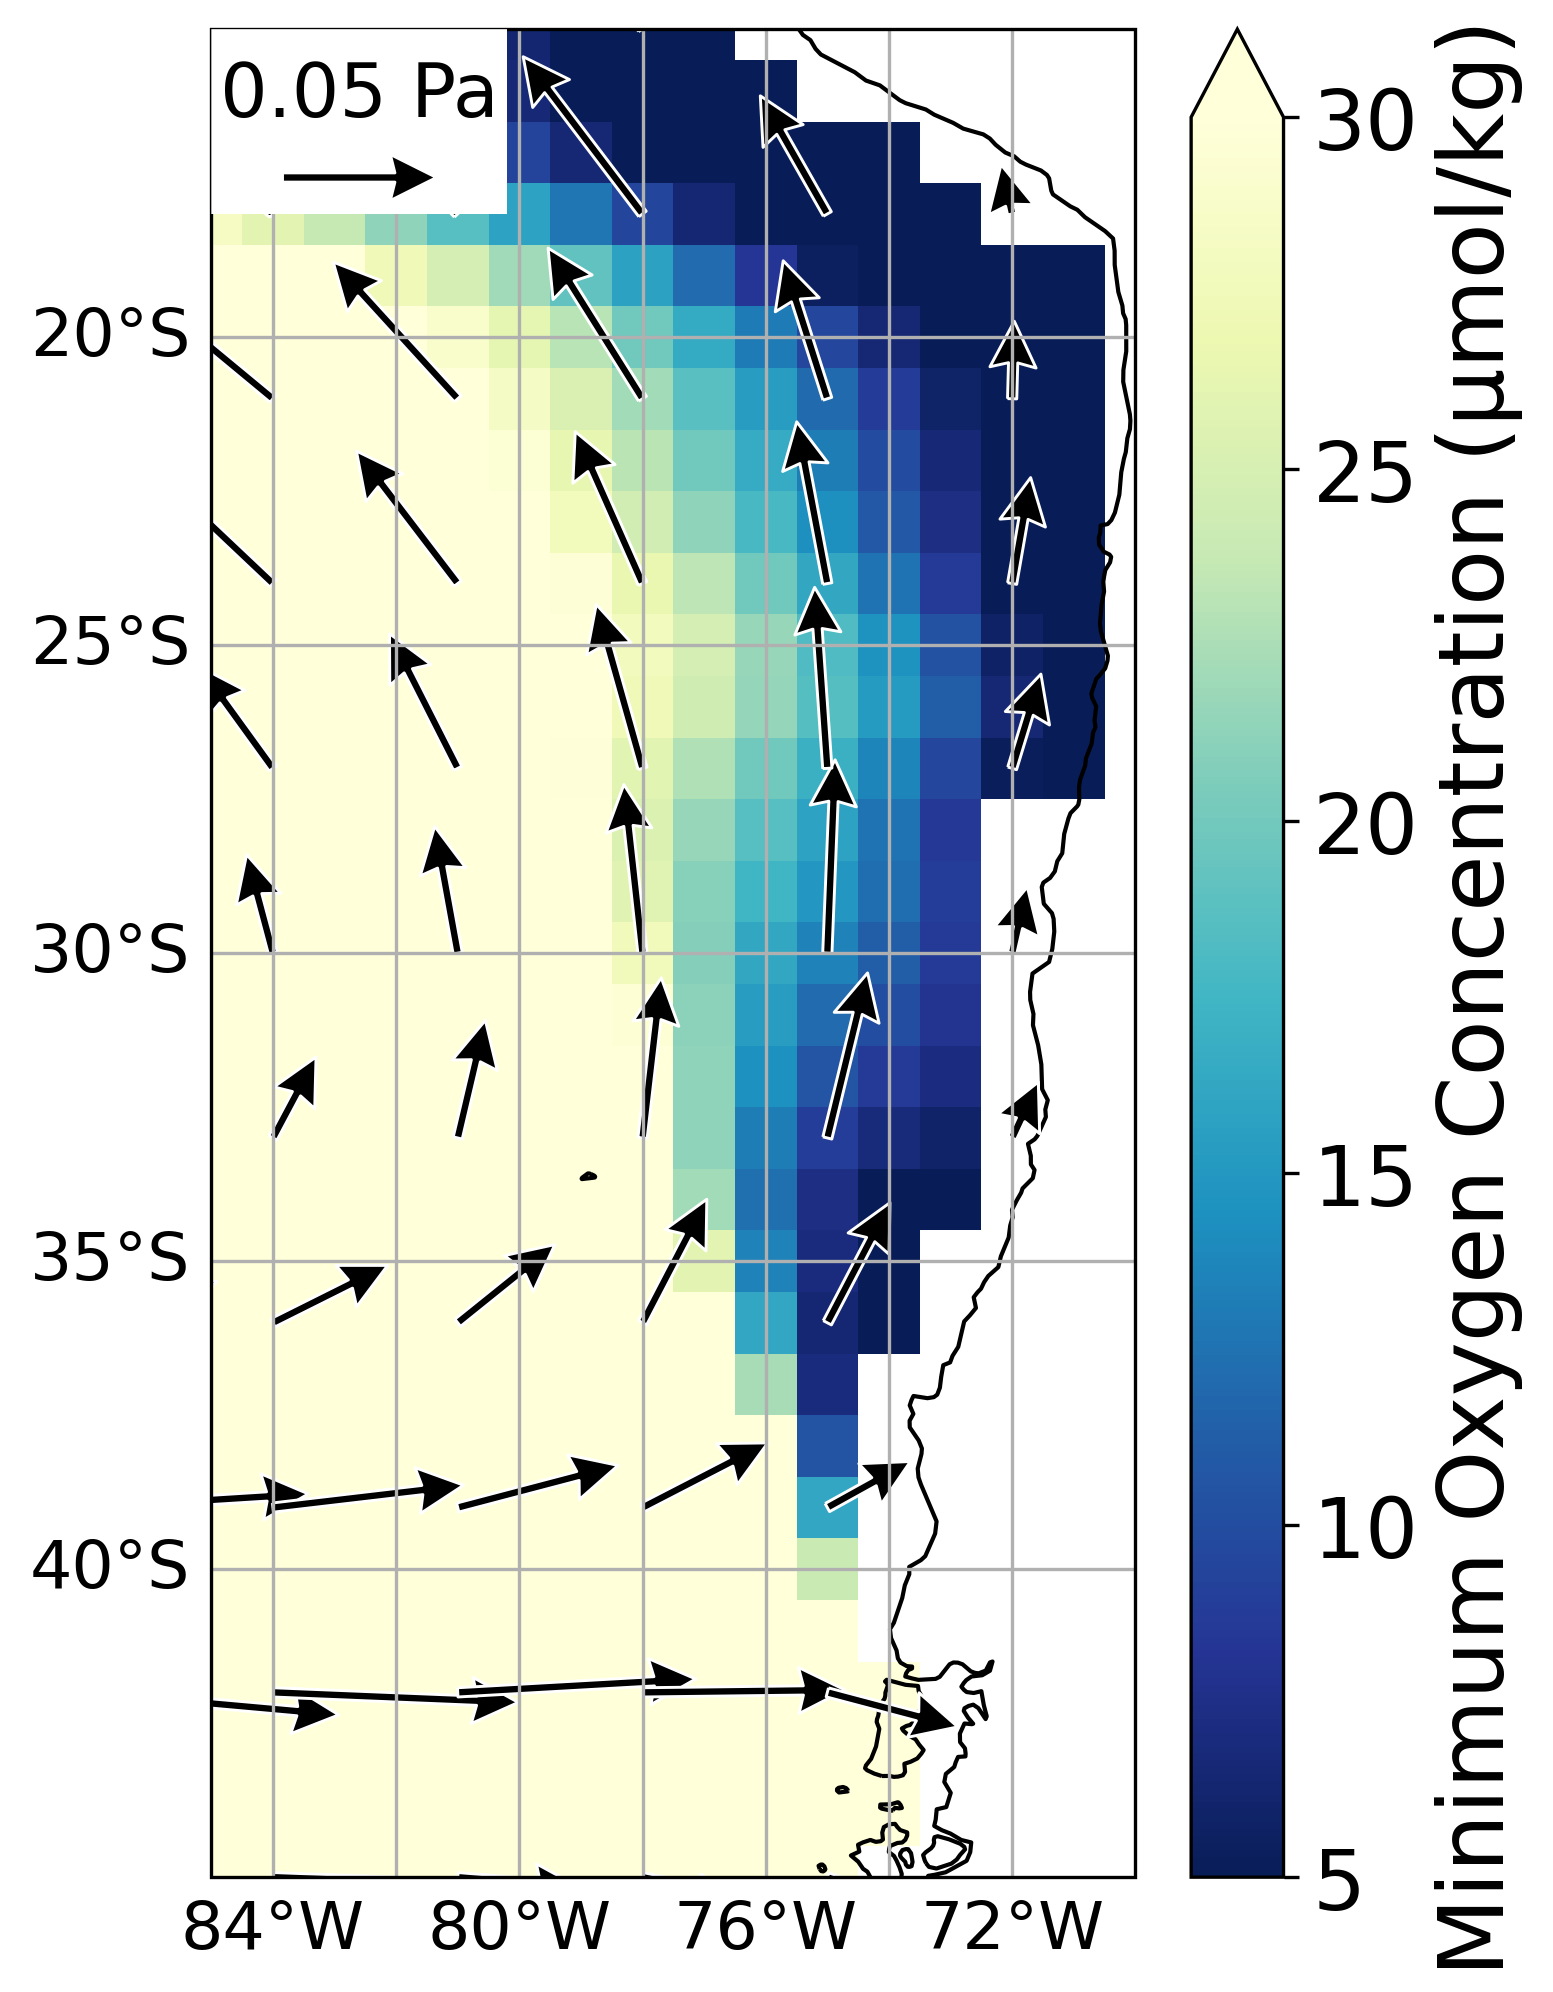

In [12]:
fig = plt.figure(figsize=(8,8), dpi=300)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

plot = plt.pcolormesh(O2min.lon, O2min.lat, O2min, transform=ccrs.PlateCarree(), cmap = 'YlGnBu_r', vmin=5, vmax=30)
cbar = plt.colorbar(plot, orientation='vertical', extend='max', pad=0.03)
cbar.ax.set_ylabel('Minimum Oxygen Concentration (µmol/kg)', fontsize=22)
cbar.ax.tick_params(labelsize=20)

skip = (slice(None, None, 3), slice(None, None, 3)) # Skip some data points for less arrow density
q = plt.quiver(X[skip],Y[skip],taux.values[skip],tauy.values[skip],headwidth=5,headlength=5, scale=0.3, width=0.01, 
               facecolor='black', edgecolor='white', linewidth=0.7, zorder=2)
ax.add_patch(mpatches.Rectangle(xy=[-85, -18], width=4.8, height=3,
                                facecolor='white',
                                transform=ccrs.PlateCarree(), zorder=10)
             )
qk = plt.quiverkey(q, X=0.16, Y=.92, U=0.05, label='0.05 Pa', labelsep=.15, zorder=11)
qk.text.set_fontsize(18)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size':16}
gl.ylabel_style = {'size':16}

ax.set_extent([275, 290, -45, -15])

plt.show()